[깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/tree/main/%EC%B5%9C%EC%8B%A0%20%EA%B8%B0%EC%B6%9C%EB%8F%99%ED%98%95%20%EB%AA%A8%EC%9D%98%EA%B3%A0%EC%82%AC)

## 머신러닝
### 1. 데이터 탐색 
#### (1) 시각화 포함 탐색적 자료분석을 시행하시오(EDA).
#### (2) 이상치를 식별하고 처리하시오.
#### (3) 앞선 두 단계에서 발견한 향후 분석 시에 고려해야 할 사항을 작성하시오.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/diabetes_for_test.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### (1) 시각화 포함 탐색적 자료분석을 시행하시오(EDA).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


In [34]:
# outcome에 따른 각 컬럼별 평균값
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,36.934000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


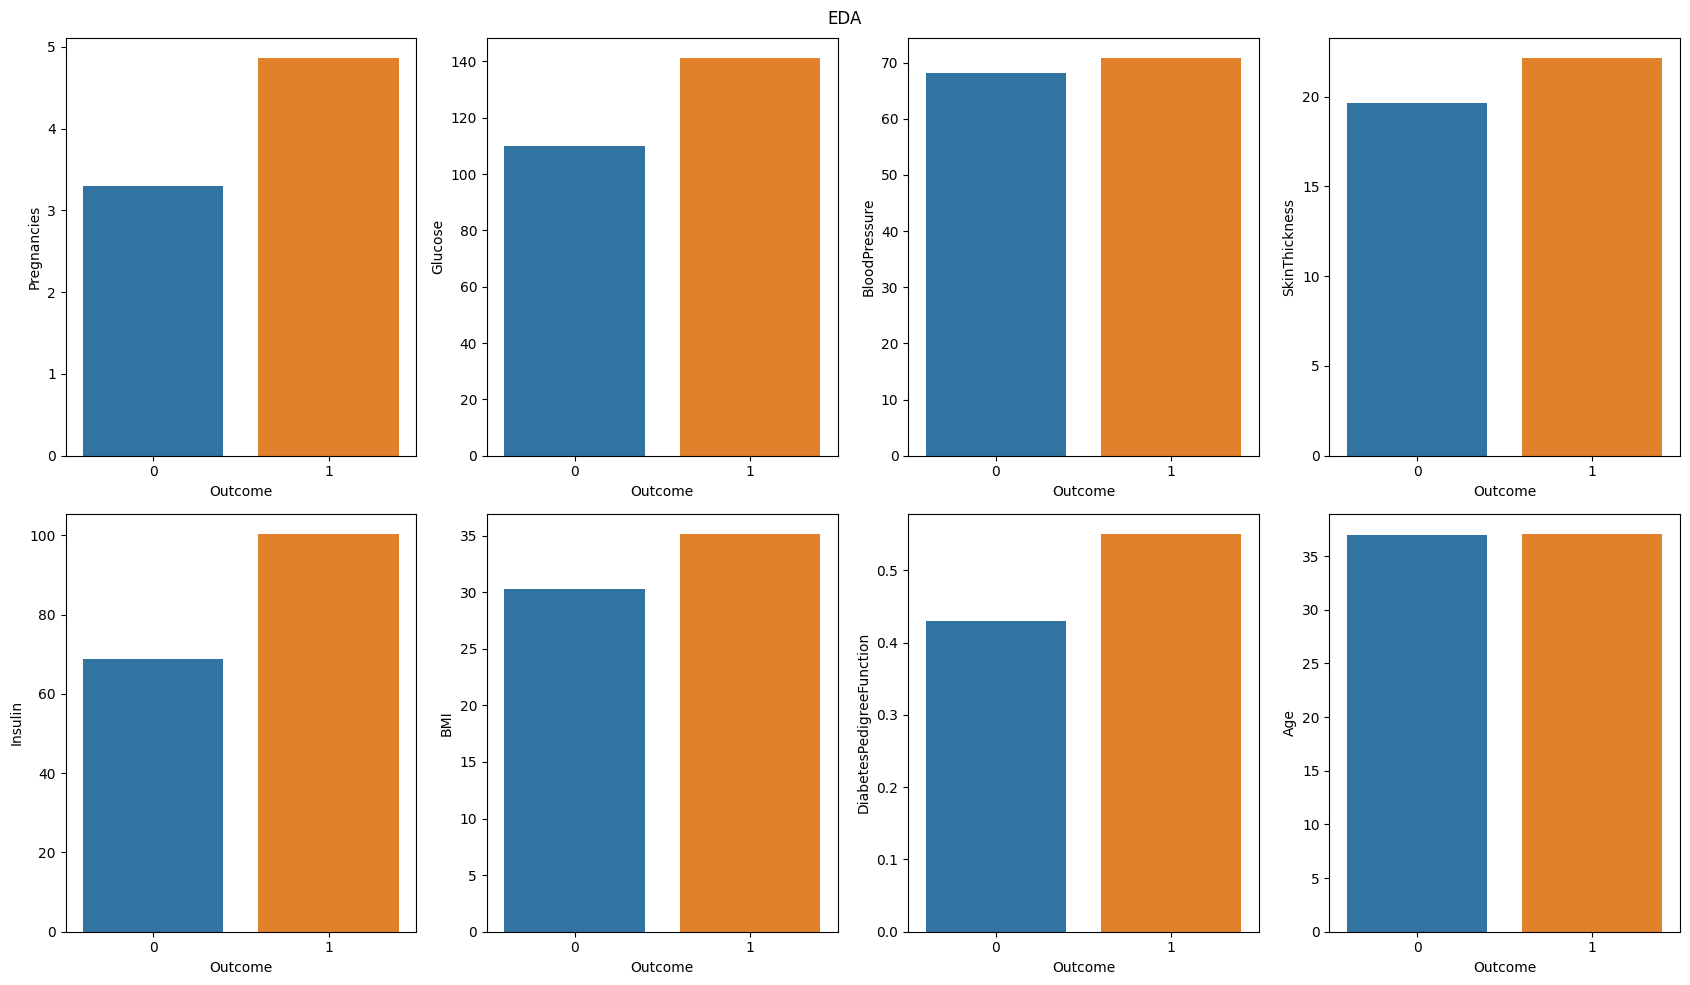

In [22]:
fig, ax = plt.subplots(2, 4, figsize=(17,10))

features = df.drop(columns=['Outcome'], axis=1).columns

for i, feature in zip(range(8), features):
    row = int(i/4)
    col = i%4
    sns.barplot(data=df, x='Outcome', y=feature, ax=ax[row][col], ci=None)

plt.suptitle('EDA')
plt.tight_layout()
plt.show()

[해석]
- 당뇨병이 있는 사람은 그렇지 않은 사람보다 Pregnancies 수치가 더 높음.
- 당뇨병이 있는 사람은 그렇지 않은 사람보다 Glucose 수치가 더 높음.
- 당뇨병이 있는 사람은 그렇지 않은 사람보다 Insulin 수치가 더 높음.
- 당뇨병이 있는 사람은 그렇지 않은 사람보다 BMI 수치가 더 높음.

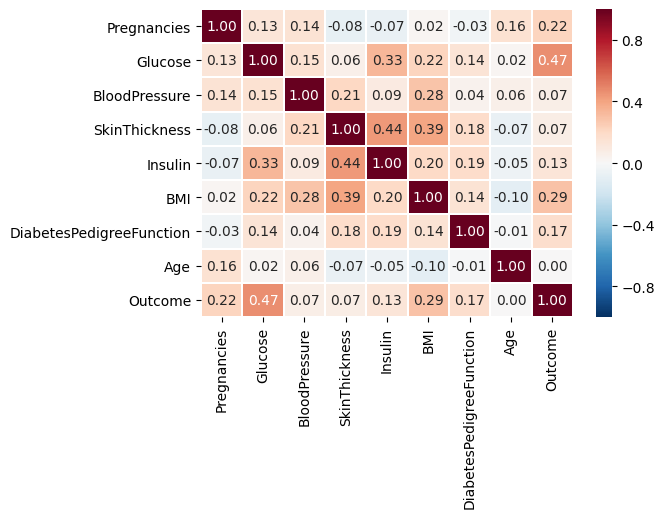

In [14]:
df_corr = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(df_corr, annot=True, fmt='.2f', vmax=1, vmin=-1, cmap='RdBu_r', linewidth=.3)
plt.show()

[해석]
- Outcome과 Glucose 간에 약한 양의 상관성이 존재함(0.47).
- SkinThickness와 Inslin 간에 약한 상의 상관성이 존재함(0.44).
- BMI와 SkinThickness 간에 약한 상의 상관성이 존재함(0.39).
- 따라서 Outcome을 제외한 변수들 간에 0.9 이상의 상관성은 없으므로 모든 변수를 모델링해도 될 것임.

#### (2) 이상치를 식별하고 처리하시오.

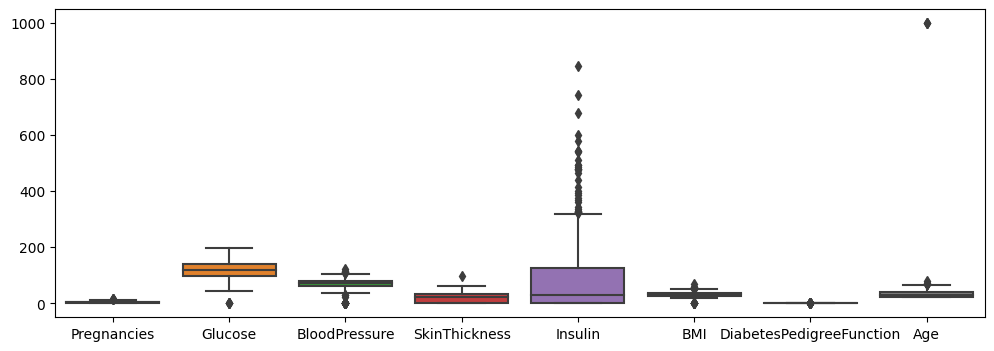

In [29]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df.drop('Outcome', axis=1))
plt.show()

[해석]
- 상자 그림을 시각화한 결과, Age에서 가장 멀리 떨어진 이상치가 존재하기에 이상치 처리가 필요하다고 판단함.
- Insulin 에서도 이상치가 많이 발견되었지만 실제로 이상치를 가진 사람이 있을 수 있기에 현업의 의견이 필요할 것으로 판단되어 Age의 이상치만 처리함.

<AxesSubplot:xlabel='Age'>

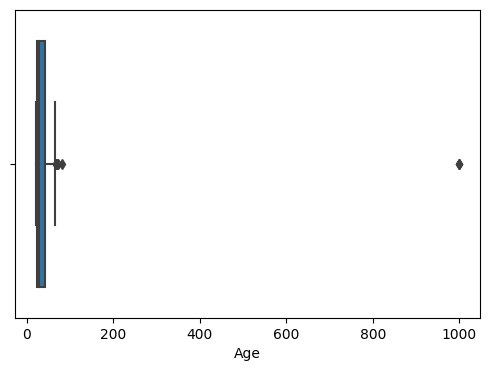

In [35]:
# Age 상자그림
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='Age')
plt.show()

In [38]:
# Age 값 내림차순
df['Age'].sort_values(ascending=False)

629    999
684    999
559    999
459     81
453     72
      ... 
486     21
136     21
145     21
465     21
511     21
Name: Age, Length: 768, dtype: int64

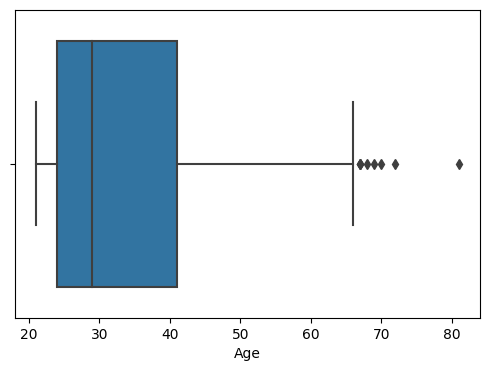

In [2]:
# Age 이상치를 중앙값으로 대체
cond = (df['Age'] >= 100)
df.loc[cond, 'Age'] = np.median(df.Age)

# Age 상자그림
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='Age')
plt.show()

In [3]:
# Glucose, BloodPressure 이상치 대체(중앙값)
cond = (df['Glucose'] == 0)
df.loc[df.loc[cond].index, 'Glucose'] = df.Glucose.median()

cond = (df['BloodPressure'] == 0)
df.loc[df.loc[cond].index, 'BloodPressure'] = df.BloodPressure.median()

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,79.799479,31.992578,0.471876,33.191406,0.348958
std,3.369578,30.438286,12.096642,15.952218,115.244002,7.884160,0.331329,11.683509,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### (3) 앞선 두 단계에서 발견한 향후 분석 시에 고려해야 할 사항을 작성하시오.

- describe() 함수 결과, 최솟값, 최댓값의 차이가 많이 나는 컬럼이 존재하기에, 선형 모델 사용시, scale를 적용할 필요가 있음.

### 2. 클래스 불균형 처리
#### (1) 업 샘플링 과정을 설명하고 결과를 작성하시오

In [4]:
x = df.drop('Outcome', axis=1)
y=df.Outcome

df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({1: 500, 0: 500})


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({1: 500, 0: 500})


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[해석]
- 업 샘플링은 소수의 레이블을 지닌 데이터세트를 다수 레이블을 지닌 데이터세의 수만큼 증가시키는 것을 의미함.
- SMOTE을 이용하면 소수 레이블을 지닌 데이터세트의 관측값에 대한 K개 최근접 이웃을 찾고, 관측값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법으로 샘플을 수를 늘림.
- 기존에 268개였던 0 레이블이 500으로 증가함.

#### (2) 언더 샘플링 과정을 설명하고 결과를 작성하시오.

In [16]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy = 'majority')
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 268, 1: 268})


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[해석]
- 언더 샘플링은 다수를 차지하는 레이블에서 무작위로 데이터를 제거하는 방식임.
- sampling_strategy = 'majority'을 설정하여 다수 레이블의 데이터를 샘플링하여 소수 레이블의 데이터 수와 동일하게 함.
- 기존에 500개였던 1 레이블이 268개로 감소함.

#### (3) 둘 중 하나를 선택하고 선택한 이유를 서술하시오.
- 언더 샘플링은 데이터 손실이 발생하고, 과대적합 위험이 있기에 오버 샘플링을 선택함.

### 3. 모델링
#### (1) 최소 3개 이상의 알고리즘을 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 선정하시오.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import time

log = LogisticRegression()
xgb = XGBClassifier(random_state=0)
svm_clf = SVC(kernel='linear')

[해석]
속도 측면에서 Logistic regression, 정확도 측면에서 SVM, 기타로 XGBoost를 제시함.

#### (2) 모델을 비교하고 결과를 설명하시오.

In [10]:
# 데이터 분할
X = df.drop('Outcome', axis=1)
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [11]:
# SMOTE을 통한 오버 샘플링
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (537, 8) (537,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (700, 8) (700,)
SMOTE 적용 후 레이블 값 분포:
 1    350
0    350
dtype: int64


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [12]:
# scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

In [30]:
# LogisticRegression

## 교차검증
scores = cross_val_score(log, X_train_scaled, y_train_over, cv=5, scoring='accuracy')
print('로지스틱 교차 검증 정확도:', scores)

## 모델 학습
start = time.time()
log.fit(X_train_scaled, y_train_over)
end = time.time()

## 모델 예측
pred = lgr.predict(X_test_scaled)

print(f"end-start: {end-start:.5f} sec")
print('로지스틱 정확도:', accuracy_score(y_test, pred))

로지스틱 교차 검증 정확도: [0.74285714 0.72857143 0.77142857 0.74285714 0.69285714]
end-start: 0.02810 sec
로지스틱 정확도: 0.7575757575757576


In [31]:
# SVC

## 교차검증
scores = cross_val_score(svm_clf, X_train_scaled, y_train_over, cv=5, scoring='accuracy')
print('SVC 교차 검증 정확도:', scores)

## 모델 학습
start = time.time()
svm_clf.fit(X_train_scaled, y_train_over)
end = time.time()

## 모델 예측
pred = svc.predict(X_test_scaled)

print(f"end-start: {end-start:.5f} sec")
print('SVC 정확도:', accuracy_score(y_test, pred))

SVC 교차 검증 정확도: [0.73571429 0.75       0.77857143 0.75       0.70714286]
end-start: 0.01595 sec
SVC 정확도: 0.7705627705627706


In [32]:
# XGBClassifier

## 교차검증
scores = cross_val_score(xgb, X_train_scaled, y_train_over, cv=5, scoring='accuracy')
print('xgb 교차 검증 정확도:', scores)

## 모델 학습
start = time.time()
xgb.fit(X_train_scaled, y_train_over)
end = time.time()

## 모델 예측
pred = xgb.predict(X_test_scaled)

print(f"end-start: {end-start:.5f} sec")
print('xgb 정확도:', accuracy_score(y_test, pred))

C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:16:58] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:58] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:59] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:59] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

[해석]
- 로지스틱 회귀분석의 속도가 가장 빨랐고, svm의 정확도가 가장 높음.

In [6]:
# log = LogisticRegression()
# xgb = XGBClassifier(random_state=0)
# svm_clf = SVC(kernel='linear')

# X = df.drop('Outcome', axis=1)
# y=df[['Outcome']]

# from sklearn.model_selection import KFold
# import time

# smote = SMOTE(random_state=0)
# kfold = KFold()
# def model_result(model):
#     pred_li=[]
#     for train_index, test_index in kfold.split(X): # 5개의 경우로 데이터 분할(인덱스로 추출됨)
#         X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
#         y_train, y_test = y.iloc[train_index, :], y.iloc[test_index, :]
        
#         X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
        
#         start = time.time()
#         model.fit(X_train_resample, y_train_resample)
#         end = time.time()
        
#         pred = model.predict(X_test)
#         pred_li.append(accuracy_score(pred, y_test['Outcome']))
    
#     # 마지막 데이터 학습 속도
#     print(f"{end-start:.5f} sec")
#     # 5개의 train 데이터에 대한 정확도 평균값
#     print(np.mean(pred_li))

#### (3) 속도 개선을 위한 차원 축소 방법을 설명하고 수행하시오. 그리고 예측 성능과 속도를 비교하고 결과를 작성하시오.

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=8)
X_train_pca = pca.fit(X_train_scaled)

print('분산 설명력: ', pca.explained_variance_ratio_)
print('분산 설명력: ', pca.explained_variance_ratio_[:5].sum())

분산 설명력:  [0.24689302 0.23170489 0.12759189 0.10680121 0.10172293 0.07654757
 0.05524614 0.05349236]
분산 설명력:  0.8147139251887229


In [57]:
# LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

## SMOTE
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train_scaled, y_train)

## PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## 교차검증
scores = cross_val_score(log, X_train_pca, y_train, cv=5, scoring='accuracy')

## 모델 학습
start=time.time()
log.fit(X_train_pca, y_train)
end = time.time()

## 모델 예측
pred = log.predict(X_test_pca)

print(f"end-start: {end-start:.5f} sec")
print('로지스틱 정확도:', accuracy_score(y_test, pred))

end-start: 0.00399 sec
로지스틱 정확도: 0.7489177489177489


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [59]:
# SVC

## SMOTE
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train_scaled, y_train)

## PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## 교차검증
scores = cross_val_score(svm_clf, X_train_pca, y_train, cv=5, scoring='accuracy')

## 모델 학습
start=time.time()
svm_clf.fit(X_train_pca, y_train)
end = time.time()

## 모델 예측
pred = svm_clf.predict(X_test_pca)

print(f"end-start: {end-start:.5f} sec")
print('SVC 정확도:', accuracy_score(y_test, pred))

end-start: 0.01496 sec
SVC 정확도: 0.7489177489177489


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [60]:
# XGBClassifier

## SMOTE
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train_scaled, y_train)

## PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## 교차검증
scores = cross_val_score(xgb, X_train_pca, y_train, cv=5, scoring='accuracy')

## 모델 학습
start=time.time()
xgb.fit(X_train_pca, y_train)
end = time.time()

## 모델 예측
pred = xgb.predict(X_test_pca)

print(f"end-start: {end-start:.5f} sec")
print('XGB 정확도:', accuracy_score(y_test, pred))

C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:59:13] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o